# **CS 181 HW5 Problem 1**
---

#### Initialize data and parameters

Consider a specific example of when we have $K = 3$ component Gamma distributions. Let's initialize the initial parameter values for $\theta$ and $\beta_k$ as follows:
$$
\begin{align*}
  \theta_k &=  1/K, \\
  \beta_k & = k/K.
\end{align*}
$$

Note that we usually initialize $\theta$ and $\beta_k$ randomly. However, by fixing the initial $\theta$ and $\beta_k$, EM becomes deterministic which makes debugging (and grading) easier.



In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

x = torch.load('data.pt').numpy()
K = 3
theta = np.ones(K) / K
alpha = 5.0
betas = np.arange(1, K + 1) / K

#### E-step

In [29]:
def e_step(x, alpha, theta, betas):
    q = theta * (betas ** alpha) * np.exp(-betas * x)
    return q / np.sum(q, axis = 1, keepdims=True)

#### M-step

In [30]:
def m_step(x, q, alpha):
    theta_hat = np.mean(q, axis = 0)
    beta_hats = alpha * np.sum(q, axis=0) / np.sum(q * x, axis = 0)
    return theta_hat, beta_hats

#### Log Likelihood

In [31]:
def gamma_pdf(x, alpha, betas):
    return (betas ** alpha) * (x ** (alpha - 1)) * np.exp(-betas * x) / factorial(alpha - 1)

def log_px(x, alpha, theta, betas):
    q = e_step(x, alpha, theta, betas)
    return np.sum(q * np.log(gamma_pdf(x, alpha, betas) * theta), axis = 1)

def log_likelihood(x, alpha, theta, betas):
    return np.sum(log_px(x, alpha, theta, betas))

#### EM algorithm

In [32]:
def run_em(x, alpha, theta, betas, iterations=1000):
    for _ in range(iterations):
        q = e_step(x, alpha, theta, betas)
        theta, betas = m_step(x, q, alpha)
    return theta, betas

#### Plot

In [35]:
def make_plot(x, alpha, theta, betas):
    x_test = np.linspace(0.01, np.max(x), 1000)[:, np.newaxis]
    prob = np.exp(log_px(x_test, alpha, theta, betas))
    ll = log_likelihood(x, alpha, theta, betas)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    fig.subplots_adjust(top=0.7)
    fig.suptitle(f'theta = {theta}\nbeta = {betas}\nlog likelihood = {ll:.3e}')

    ax1.set_title('Dataset')
    ax1.hist(x, bins=100, color='tomato')
    ax2.set_title('Gamma mixture')
    ax2.plot(x_test, prob, color='tomato')
    plt.savefig('p1.png', bbox_inches='tight')

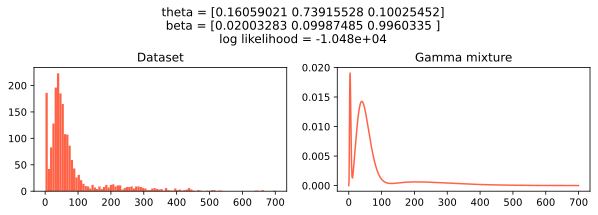

In [36]:
theta_opt, betas_opt = run_em(x, alpha, theta, betas)
make_plot(x, alpha, theta_opt, betas_opt)